<h1 style="color:red;text-align:center;font-size:50px">Ejemplo de VaR Monte Carlo</h1>

# 📖 **Introducción** 
<p>El Valor en Riesgo (VaR) es una métrica financiera utilizada para estimar la posible pérdida en el valor de una inversión o cartera durante un período de tiempo determinado, con un nivel de confianza específico. Proporciona una medida probabilística de la peor pérdida esperada bajo condiciones normales de mercado.</p>

# 🎯 **Objetivo**  

El propósito de este análisis es calcular el **Valor en Riesgo (VaR) al 95% de confianza** para un portafolio de inversión de **$300,000,000 COP**, distribuido de la siguiente manera:  

📌 **55% en acciones de Ecopetrol**  
📌 **45% en acciones de Celsia**  

Para ello, aplicaremos el **método paramétrico**, el cual se basa en la estimación de los retornos esperados, la varianza de cada activo y la covarianza entre ellos. Estos parámetros nos permitirán modelar la distribución normal de los retornos del portafolio, asumiendo que dichos retornos siguen una distribución normal.  

✅ Con este enfoque, determinaremos la **máxima pérdida esperada bajo condiciones normales de mercado**.  


# 📊 **Metodología**  

Para calcular el **Valor en Riesgo (VaR) histórico** del portafolio, seguimos estos pasos:  

### 1️⃣ **Obtención de datos**  
📥 Descargamos los precios de cierre históricos de las acciones de **Ecopetrol** y **Celsia** desde *Yahoo Finance*.  

### 2️⃣ **Cálculo de retornos diarios**  
📈 Calculamos los rendimientos diarios de cada acción a partir de la variación porcentual entre precios consecutivos.  

### 3️⃣ **Cálculo de los parámetros de cada acción**  
🔢 Determinamos la **varianza** y el **promedio (retorno esperado)** de las acciones de **Ecopetrol** y **Celsia**.  

### 4️⃣ **Cálculo de la covarianza**  
📊 Calculamos la **covarianza** entre los retornos diarios de **Ecopetrol** y **Celsia**, lo que nos permite medir la relación y dependencia entre ambos activos.  

### 5️⃣ **Cálculo de la desviación estándar y retorno del portafolio**  
📉 Calculamos la **desviación estándar** del portafolio conformado por **Ecopetrol** y **Celsia**, así como su **retorno esperado**.  

### 6️⃣ **Cálculo de Z-Scores aleatorios**  
📌 Construimos un vector de **Z-Scores** aleatorio, cada valor en este vector simulara un **escenario** distinto.  

### 7️⃣ **Visualización del histograma de escenarios**  
📊 Se muestra un **histograma de los escenarios simulados**, resaltando el punto en el que el **VaR es superado**. Esto permite una interpretación más clara del riesgo y ayuda a visualizar el umbral de pérdidas significativas.  


In [1]:
import yfinance as yf 
import numpy as np
from scipy.stats import norm 
import matplotlib.pyplot as plt
import seaborn as sns 

**yfinance**: Es una API que permite obtener datos financieros reales desde Yahoo Finance, incluyendo precios de acciones, volúmenes y otros indicadores.

**numpy**: Es una biblioteca de Python que facilita la manipulación y el cálculo eficiente de arreglos numéricos, siendo ampliamente utilizada en operaciones matemáticas y científicas.

In [2]:
"""
* Se crean objetos Ticker para las acciones de Ecopetrol y Celsia en la Bolsa de Valores de Colombia.
* Se descargan los datos históricos de precios para un año, concretamente entre el 11 de marzo de 2024 y el 11 de marzo de 2025.
"""
dat_ec = yf.Ticker("ECOPETROL.CL") 
dat_cl = yf.Ticker("CELSIA.CL") 

datos_ecopetrol = dat_ec.history(start="2024-03-11",end="2025-03-12")
datos_celsia = dat_cl.history(start="2024-03-11",end="2025-03-12")


In [3]:
datos_ecopetrol

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2024-03-11 00:00:00-04:00,1839.808770,1862.245463,1812.884740,1848.783447,7513846,0.0,0.0
2024-03-12 00:00:00-04:00,1848.783468,1875.707499,1839.808791,1862.245483,4786471,0.0,0.0
2024-03-13 00:00:00-04:00,1884.682265,1898.144281,1866.732910,1866.732910,3251229,0.0,0.0
2024-03-14 00:00:00-04:00,1871.220221,1902.631592,1857.758205,1902.631592,7189970,0.0,0.0
2024-03-15 00:00:00-04:00,1902.631591,1983.403687,1889.169575,1983.403687,46520253,0.0,0.0
...,...,...,...,...,...,...,...
2025-03-05 00:00:00-05:00,1691.726624,1745.574686,1691.726624,1732.112671,8718919,0.0,0.0
2025-03-06 00:00:00-05:00,1732.112685,1808.397440,1727.625346,1794.935425,9321401,0.0,0.0
2025-03-07 00:00:00-05:00,1794.935386,1848.783447,1794.935386,1848.783447,7431758,0.0,0.0


### ☝️ **Descripción de la Tabla**  

Esta tabla presenta los 5 valores más antiguos y los 5 más recientes dentro del período seleccionado para **Ecopetrol**.  

Además, en la parte inferior se indica que el conjunto de datos contiene **251 registros** distribuidos en **7 columnas**, correspondientes a la información histórica de Ecopetrol.  

In [4]:
datos_celsia

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2024-03-11 00:00:00-04:00,3563.944902,3573.071521,3536.565043,3559.381592,153741,0.0,0.0
2024-03-12 00:00:00-04:00,3573.071521,3595.888070,3527.438424,3559.381592,191639,0.0,0.0
2024-03-13 00:00:00-04:00,3550.255038,3550.255038,3541.128418,3541.128418,122083,0.0,0.0
2024-03-14 00:00:00-04:00,3541.128382,3541.128382,3500.058594,3500.058594,165578,0.0,0.0
2024-03-15 00:00:00-04:00,3504.621964,3532.001823,3194.316895,3194.316895,3558941,0.0,0.0
...,...,...,...,...,...,...,...
2025-03-05 00:00:00-05:00,3677.565623,3692.374613,3652.883975,3682.501953,461001,0.0,0.0
2025-03-06 00:00:00-05:00,3682.501953,3692.374613,3662.756634,3682.501953,405306,0.0,0.0
2025-03-07 00:00:00-05:00,3682.501895,3717.056203,3677.565566,3712.119873,643821,0.0,0.0



### ☝️ **Descripción de la Tabla**  

Esta tabla presenta los 5 valores más antiguos y los 5 más recientes dentro del período seleccionado para **Celsia**.  

Además, en la parte inferior se indica que el conjunto de datos contiene **251 registros** distribuidos en **7 columnas**, correspondientes a la información histórica de Ecopetrol.  

In [5]:
"""
📌 **Selección de Datos**  
Se extraen únicamente los datos del precio de cierre de las acciones de Celsia y Ecopetrol
ya que es la información necesaria para calcular el VaR del portafolio.  
"""

accion_ecopetrol = datos_ecopetrol[['Close']].copy() #metodo copy() para evitar generar cambios en el dataframe original
accion_celsia = datos_celsia[['Close']].copy()

### 2️⃣ **Cálculo de retornos diarios**  

El **retorno diario** mide la variación porcentual en el precio de cierre de una acción respecto al día anterior. Se calcula utilizando la siguiente fórmula:  

$$
R_t = \frac{P_t - P_{t-1}}{P_{t-1}}
$$

Donde:  
- $R_t$: es el retorno del día \( t \).  
- $P_t$: es el precio de cierre en el día \( t \).  
- $P_{t-1}$: es el precio de cierre en el día \( t-1 \).

In [6]:
"""  
Las siguientes líneas de código calculan el retorno diario de las acciones de Ecopetrol y Celsia,  
usando la variación porcentual entre el precio de cierre actual y el del día anterior.  
"""  

accion_ecopetrol['Retorno_diario'] = (accion_ecopetrol['Close'] - accion_ecopetrol['Close'].shift(1))/accion_ecopetrol['Close'].shift(1)
accion_ecopetrol.fillna(0, inplace=True)
accion_celsia['Retorno_diario'] = (accion_celsia['Close'] - accion_celsia['Close'].shift(1))/accion_celsia['Close'].shift(1)
accion_celsia.fillna(0, inplace=True)

### 3️⃣ **Cálculo de los parámetros de cada acción**  

In [7]:
""" 
Calcula la varianza y el promedio de los retornos diarios de las acciones de Ecopetrol y Celsia.
La varianza mide la volatilidad o dispersión de los retornos respecto a su promedio,
mientras que el promedio representa el rendimiento esperado de la acción.
"""
var_Ecopetrol = accion_ecopetrol['Retorno_diario'].var() #varianza de los retornos diarios de ecopetrol
exp_Ecopetrol = accion_ecopetrol['Retorno_diario'].mean() #promedio de los retornos diarios de ecopetrol 

var_Celsia = accion_celsia['Retorno_diario'].var() #varianza de los retornos diarios de celsia
exp_Celsia = accion_celsia['Retorno_diario'].mean() #varianza de los retornos diarios 

### 4️⃣ **Cálculo de la covarianza** 

In [8]:
"""
Calcula la matriz de covarianza entre los retornos diarios de las acciones de Ecopetrol y Celsia.
La covarianza mide la relación lineal entre ambas series de datos:
- Un valor positivo indica que tienden a moverse en la misma dirección.
- Un valor negativo indica que tienden a moverse en direcciones opuestas.
- Un valor cercano a cero sugiere que no hay una relación lineal fuerte entre ellas.
"""
np.cov(accion_ecopetrol['Retorno_diario'],accion_celsia['Retorno_diario']) 

array([[7.61334479e-04, 6.30801119e-05],
       [6.30801119e-05, 2.45040348e-04]])

☝️ **Descripción del arreglo**

Este arreglo representa la matriz de covarianza entre los retornos diarios de Ecopetrol y Celsia. Los elementos en la diagonal corresponden a la varianza de cada empresa: específicamente, el valor en la fila 1, columna 1, representa la varianza de Ecopetrol, mientras que el valor en la fila 2, columna 2, corresponde a la varianza de Celsia. Por otro lado, los elementos fuera de la diagonal reflejan la covarianza entre los retornos diarios de ambas compañías.

### 5️⃣ **Cálculo de la desviación estándar y retorno del portafolio**  

In [9]:
valor_portafolio = 300000000 
peso_Ecopetrol = 0.55
peso_Celsia = 0.45 

La **varianza de un portafolio** compuesto por dos activos se calcula con la siguiente fórmula:  

$$var = W^2_{1}*σ^2_{1}+W^2_{2}*σ^2_{2}+2*W_{1}W_{2}cov_{1,2}$$

En nuestro caso, variables de la formula son equivalentes a:

- $var$: var_portafolio; *varianza del portafolio*
- $W_{1}$: peso_Ecopetrol; *peso de Ecopetrol en el portafolio*
- $σ^2_{1}$: var_Ecopetrol; *varianza de Ecopetrol*
- $W_{2}$: peso_Celsia; *peso de Celsia en el portafolio*
- $σ^2_{2}$: var_Celsia; *varianza de Celsia*
- $cov_{1,2}$: cov_Ecopetrol_Celsia ; *covarianza entre Ecopetrol y Celsia*
## 👇

In [10]:
cov_Ecopetrol_Celsia = np.cov(accion_ecopetrol['Retorno_diario'],accion_celsia['Retorno_diario'])[0,1] #Se asigna el valor de la Covarianza entre los retornos diarios de Ecopetrol y Celsia

In [11]:
var_portafolio = (peso_Ecopetrol**2)*var_Ecopetrol +(peso_Celsia**2)*var_Celsia +2*peso_Ecopetrol*peso_Celsia*cov_Ecopetrol_Celsia 

std_portafolio = np.sqrt(var_portafolio) # Asignamos a std_portafolio la raíz cuadrada de la varianza del portafolio, esto es, la desviación estándar del portafolio.viacion estandar del portafolio

In [12]:
"""
Calcula el retorno esperado del portafolio.
El retorno esperado es una medida del rendimiento promedio que se espera obtener del portafolio.

- valor_portafolio: Valor total del portafolio.
- exp_Ecopetrol y exp_Celsia: Retornos esperados de cada activo.
- peso_Ecopetrol y peso_Celsia: Proporción de inversión en cada activo.
"""

exp_portafolio = valor_portafolio*(exp_Ecopetrol*peso_Ecopetrol+exp_Celsia*peso_Celsia) #Se calcula el retorno esperado del portafolio 

### 6️⃣ **Generacion de Z-Scores aleatorios**  

In [13]:
z_scores = np.random.normal(size=1_000_000)
VaR_escenario = exp_portafolio -valor_portafolio*std_portafolio*z_scores

### 7️⃣ **Visualización de la distribución normal del portafolio**  

El siguiente gráfico muestra el histograma de los escenarios simulados para el portafolio. El área sombreada en color naranja representa todas aquellas pérdidas que al menos alcanzan el **Value at Risk (VaR)** para un nivel de confianza del **95%**, es decir, el **cuantil 0.05** del histograma.  

Además, la línea negra indica el valor del **VaR**, proporcionando una referencia visual clara del umbral de riesgo.  


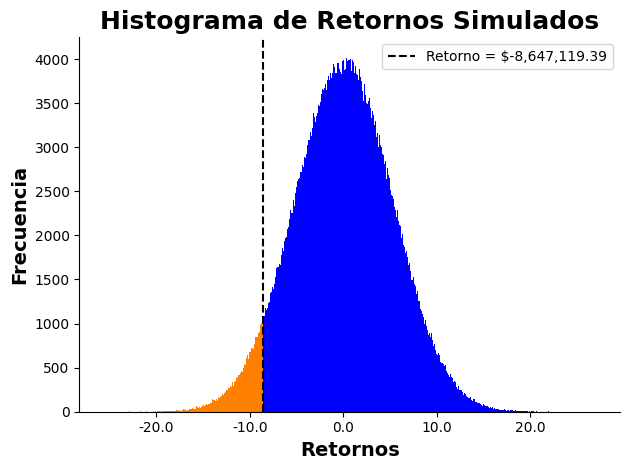

In [14]:
fig, ax = plt.subplots()

quantile_5 = np.quantile(VaR_escenario,0.05)
histograma = plt.hist(VaR_escenario,bins=1000,color='blue')

for rect in histograma[2]:

    if rect.get_x() <= quantile_5:
        rect.set_facecolor('#FF8000')
        
    

ax.xaxis.set_major_formatter(lambda x, pos: str(x / 1_000_000))  # Disminuye en un millón el tamaño de los valores en x  
ax.axvline(x=quantile_5,linestyle='--',color='black',label='Retorno = ${:,.2f}'.format(quantile_5))
plt.title('Histograma de Retornos Simulados', fontdict={'fontsize':18,'fontweight':700})
plt.xlabel('Retornos',fontdict={'fontsize':14,'fontweight':700})
plt.ylabel('Frecuencia',fontdict={'fontsize':14,'fontweight':700})
plt.legend(loc='upper right')
plt.tight_layout()
sns.despine()
plt.show()
